## This notebook is designed for the lecture on transport phenomena (29.10.2020)

__As you will see, this notebook consists of four parts:__
- Real data for comparison
- A finite-differences implementation to solve the PDE
- A cell to define the parameter alpha
- A comparison between real values and calculated ones

__First, choose an alpha for section 2. Then, run all cells 1 to 4 to get a result. If you want to change the parameter alpha afterwards, rerun cell 2-4 after changing alpha__

You can run the cells either by clicking on the cell and then on Run or press ctrl+enter


## 1. Real Data

In [14]:
# Get Measured Data
# In this cell, the data points from the experiment are stored
# Please don't change anything and run this cell once
import numpy as np



## 2. Paramter 

In [15]:
# Parameter definition

# Define a value for alpha here :

###################################################################################################################

alpha = 5  # [W/m²K]

###################################################################################################################


## 3. Finite Differences Implementation 

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from IPython.display import HTML
plt.ion()
# Outer Parameter
w = 10.       #[mm]
h = 10.       #[mm]
dx = 0.1      #[mm]
dy = 0.1      #[mm]
Tcool = 300   #[K]
T_hot = 700   #[K]

#number of nodes
nx = int(w/dx) 
ny = int(h/dy)

dx2, dy2 = dx*dx, dy*dy  #[mm²]
dt = dx2 * dy2 / (2 * alpha * (dx2 + dy2)) #[s]

# initial conditions
u0 = Tcool * np.ones((nx, ny)) #initialize field of nx*ny, all cool
u0[int(nx/2)-10:int(nx/2)+10,int(ny/2)-10:int(ny/2)+10] = T_hot 
u = u0.copy()

def do_timestep(u):
    # forward-difference in time, central-difference in space
    u[1:-1, 1:-1] = u[1:-1, 1:-1] + alpha * dt * (
          (u[2:, 1:-1] - 2*u[1:-1, 1:-1] + u[:-2, 1:-1])/dx2
          + (u[1:-1, 2:] - 2*u[1:-1, 1:-1] + u[1:-1, :-2])/dy2 )

    return u

# Number of timesteps
nsteps = 101
u_tot = np.ones([nx,ny,nsteps+1])
u_tot[:,:,0] = u
for i in range(nsteps):
    u_tot[:,:,i+1]=do_timestep(u)
    u = u_tot[:,:,i+1]

def init():
    global fig, ax, im
    fig = plt.figure(1)
    im = plt.imshow(u_tot[:,:,0],cmap=plt.get_cmap('hot'), vmin=Tcool,vmax=T_hot)
    cbar_ax = fig.add_axes([0.9, 0.15, 0.03, 0.7])
    cbar_ax.set_xlabel('$T$ / K', labelpad=20)
    fig.colorbar(im, cax=cbar_ax)
    im.set_data(u_tot[:,:,0])
    plt.close()
    return 

def animate(i):
    global u_tot
    im.set_data(u_tot[:,:,i])
    return 

init()
ani = animation.FuncAnimation(fig, animate, frames = nsteps, interval=20, blit=False) 
HTML(ani.to_jshtml())


## 4. Results 

In [84]:
# You will get your result when executing this cell. The result is the mean squared error, so the squarred error between the model's 
# predicted values and the measured values

#please fill out the google form with your alpha value and the obtained result 

# MSE:
mse = (np.square(T - realT)).mean(axis=0)
display('    ')
display('The mean squarred error (MSE) for alpha = ' + str(alpha) + ' resulted in ' + str(np.round(mse,3)))

'    '

'The mean squarred error (MSE) for alpha = 0.2 resulted in 3.109'

## Please submit your result to the google form for comparsion with the rest of the class

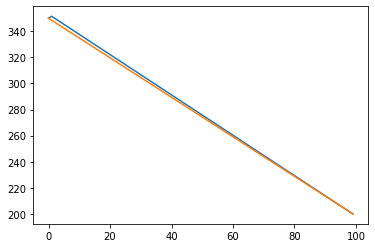

In [79]:
import matplotlib.pyplot as plt

plt.plot(T)
plt.plot(realT)